In [4]:
from google.colab import files
uploaded=files.upload()

import pandas as pd


try:
    df = pd.read_csv('sample (1).csv', encoding='utf-8')
except Exception as e:
    print(f"Error with utf-8 encoding: {e}")
    try:
        df = pd.read_csv('sample (1).csv', encoding='latin-1')
    except Exception as e:
        print(f"Error with latin-1 encoding: {e}")
        try:
            df = pd.read_csv('sample (1).csv', sep=';', encoding='utf-8')
        except Exception as e:
             print(f"Error with semicolon delimiter and utf-8 encoding: {e}")
             try:
                 df = pd.read_csv('sample (1).csv', sep=';', encoding='latin-1')
             except Exception as e:
                  print(f"Error with semicolon delimiter and latin-1 encoding: {e}")
                  print("Could not read the CSV with common delimiters and encodings.")


if 'df' in locals():
    display(df.head())

Saving sample.csv to sample (2).csv
Error with utf-8 encoding: Error tokenizing data. C error: Expected 3 fields in line 5, saw 70

Error with latin-1 encoding: Error tokenizing data. C error: Expected 3 fields in line 5, saw 70



,"Data Source,""World Development Indicators"","
0,"Last Updated Date,""2025-07-01"","
1,"Country Name,""Country Code"",""Indicator Name"",""..."
2,"Aruba,""ABW"",""Population, total"",""SP.POP.TOTL"",..."
3,"Africa Eastern and Southern,""AFE"",""Population,..."
4,"Afghanistan,""AFG"",""Population, total"",""SP.POP...."


In [5]:
df.columns

Index(['Data Source,"World Development Indicators",'], dtype='object')

In [8]:
import pandas as pd

df = pd.read_csv('sample.csv', skiprows=4)
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [9]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [16]:
from google.colab import files
uploaded = files.upload()


Saving Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv to Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv
Saving Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv to Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv


In [17]:
import pandas as pd


df_pop = pd.read_csv('sample.csv', skiprows=3)


df_meta_country = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv')
df_meta_indicator = pd.read_csv('Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv')


In [18]:
df_merged = pd.merge(df_pop, df_meta_country, on='Country Code', how='left')


In [19]:

pop_2023 = df_merged[df_merged['Indicator Name'] == 'Population, total']
pop_2023 = pop_2023[['Country Name', 'Region', 'IncomeGroup', '2023']].dropna()


pop_2023['2023'] = pd.to_numeric(pop_2023['2023'], errors='coerce')


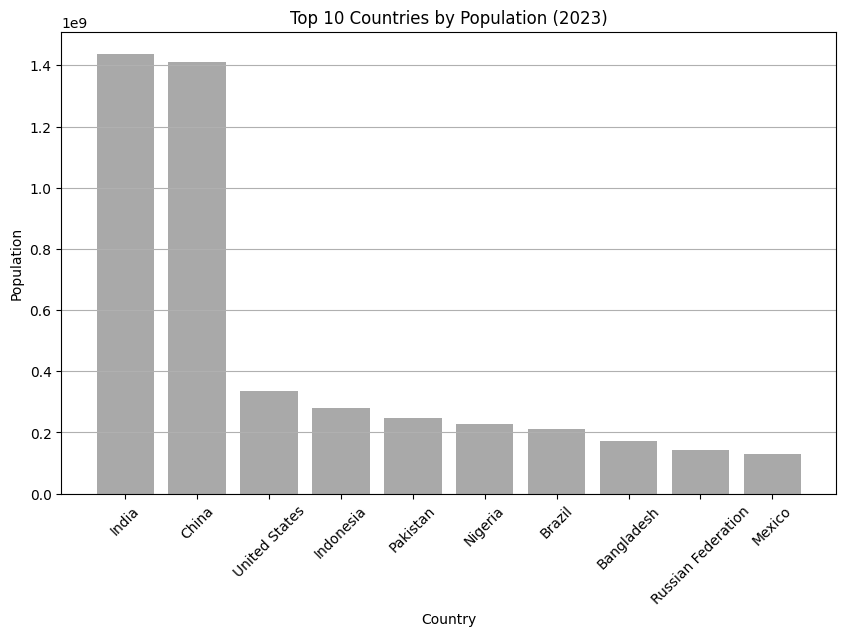

In [26]:
top10 = pop_2023.sort_values('2023', ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top10['Country Name'], top10['2023'], color='darkgrey')
plt.title('Top 10 Countries by Population (2023)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig("bar_chart_2023.png") # Save the bar chart
plt.show()

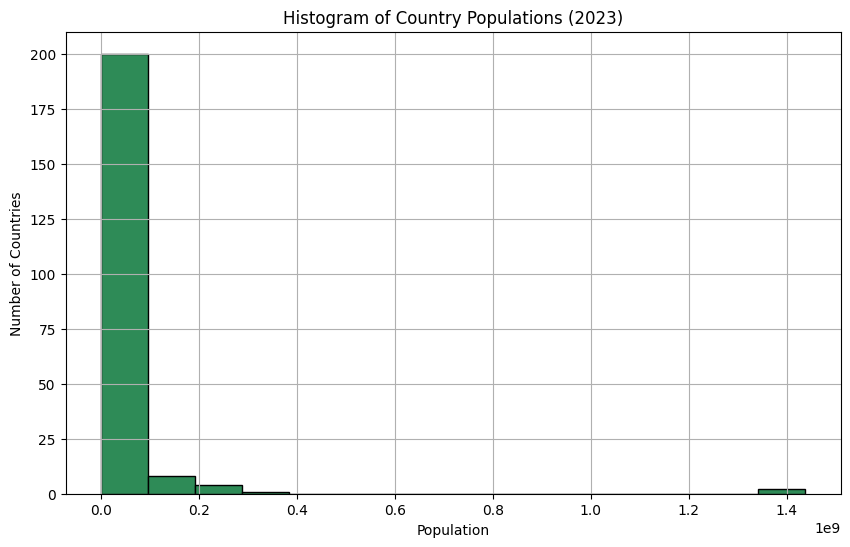

In [27]:
plt.figure(figsize=(10,6))
plt.hist(pop_2023['2023'], bins=15, color='seagreen', edgecolor='black')
plt.title('Histogram of Country Populations (2023)')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.savefig("histogram_2023.png") # Save the histogram
plt.show()

In [31]:
from google.colab import files
files.download("bar_chart_2023.png")
files.download("histogram_2023.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>